In [43]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que: 
- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

In [2]:
df = pd.read_pickle("../datos/possum_standar.pkl")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   case      101 non-null    int64   
 1   site      101 non-null    category
 2   Pop       101 non-null    object  
 3   sex       101 non-null    object  
 4   age       101 non-null    float64 
 5   hdlngth   101 non-null    float64 
 6   skullw    101 non-null    float64 
 7   totlngth  101 non-null    float64 
 8   taill     101 non-null    float64 
 9   footlgth  101 non-null    float64 
 10  earconch  101 non-null    float64 
 11  eye       101 non-null    float64 
 12  chest     101 non-null    float64 
 13  belly     101 non-null    float64 
dtypes: category(1), float64(10), int64(1), object(2)
memory usage: 10.5+ KB


In [4]:
df.describe()

,case,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,1.010000e+02,1.010000e+02,1.010000e+02,101.000000,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02
mean,52.762376,1.681823e-16,-2.042645e-15,3.569202e-15,87.269307,3.649446e-16,3.358974e-15,1.339962e-15,1.089612e-15,1.659838e-16,-6.754773e-16
std,30.573894,1.004988e+00,1.004988e+00,1.004988e+00,4.196802,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00
min,1.000000,-1.480724e+00,-2.922010e+00,-2.254539e+00,75.000000,-2.573789e+00,-1.843980e+00,-1.691417e+00,-2.136433e+00,-2.518711e+00,-2.814307e+00
25%,26.000000,-9.559764e-01,-5.799907e-01,-6.349912e-01,84.500000,-5.349443e-01,-8.876085e-01,-8.251232e-01,-6.175259e-01,-7.780184e-01,-6.037171e-01
50%,54.000000,-4.312285e-01,4.835612e-02,-1.815177e-01,88.000000,-2.523322e-02,-1.134029e-01,-3.300983e-01,-1.428675e-01,-3.200709e-02,-5.106973e-02
75%,79.000000,6.182673e-01,5.910192e-01,3.691287e-01,90.000000,4.844779e-01,9.340518e-01,9.569664e-01,6.165860e-01,4.653338e-01,5.015777e-01
max,104.000000,2.717259e+00,2.961600e+00,3.770180e+00,96.500000,3.033033e+00,2.163672e+00,1.996519e+00,2.610151e+00,2.454697e+00,2.712167e+00


In [5]:
df.hdlngth.mean()

-2.0426454807026706e-15

In [6]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

Regresión lineal simple

<AxesSubplot:xlabel='skullw', ylabel='totlngth'>

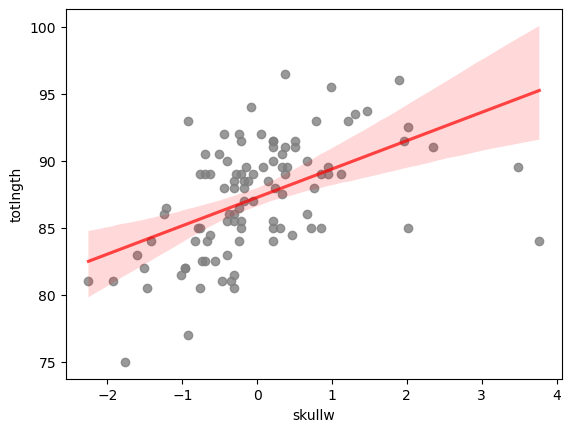

In [7]:
# ploteamos los reales vs los predichos
sns.regplot(data = df, 
x = "skullw", 
y = "totlngth", 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })

<AxesSubplot:xlabel='hdlngth', ylabel='totlngth'>

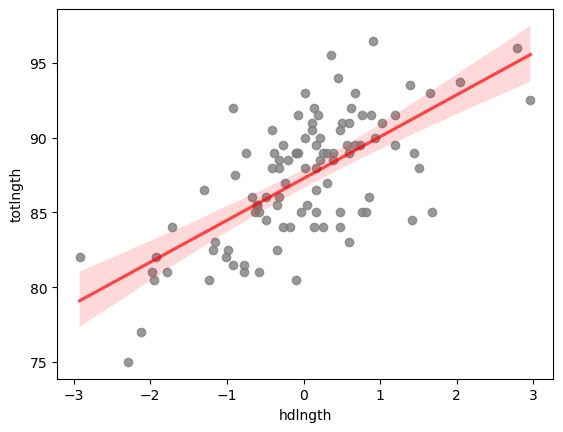

In [8]:
# ploteamos los reales vs los predichos
sns.regplot(data = df, 
x = "hdlngth", 
y = "totlngth", 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })

In [52]:
X = df[['hdlngth']]
y = df["totlngth"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
x_train.describe()

,hdlngth
count,80.000000
mean,0.014440
std,0.996659
min,-2.922010
25%,-0.451465
50%,0.119759
75%,0.591019
max,2.961600


In [12]:
x_test.describe()

,hdlngth
count,21.000000
mean,-0.055008
std,1.059405
min,-1.922368
25%,-0.608552
50%,-0.065889
75%,0.448213
max,2.790233


In [13]:
lr = LinearRegression(n_jobs=-1)

In [14]:
lr.fit(x_train, y_train) 

LinearRegression(n_jobs=-1)

In [15]:
y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) 

In [16]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df = pd.DataFrame({'Real': y_test, 'Predicted': y_predict_test, 'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head() 

,Real,Predicted,Set
89,82.0,84.162024,Train
26,85.0,85.254378,Train
42,81.0,85.422433,Train
70,83.0,83.741888,Train
15,86.0,86.178678,Train


In [17]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head() 

,Real,Predicted,Set,residuos
89,82.0,84.162024,Train,-2.162024
26,85.0,85.254378,Train,-0.254378
42,81.0,85.422433,Train,-4.422433
70,83.0,83.741888,Train,-0.741888
15,86.0,86.178678,Train,-0.178678


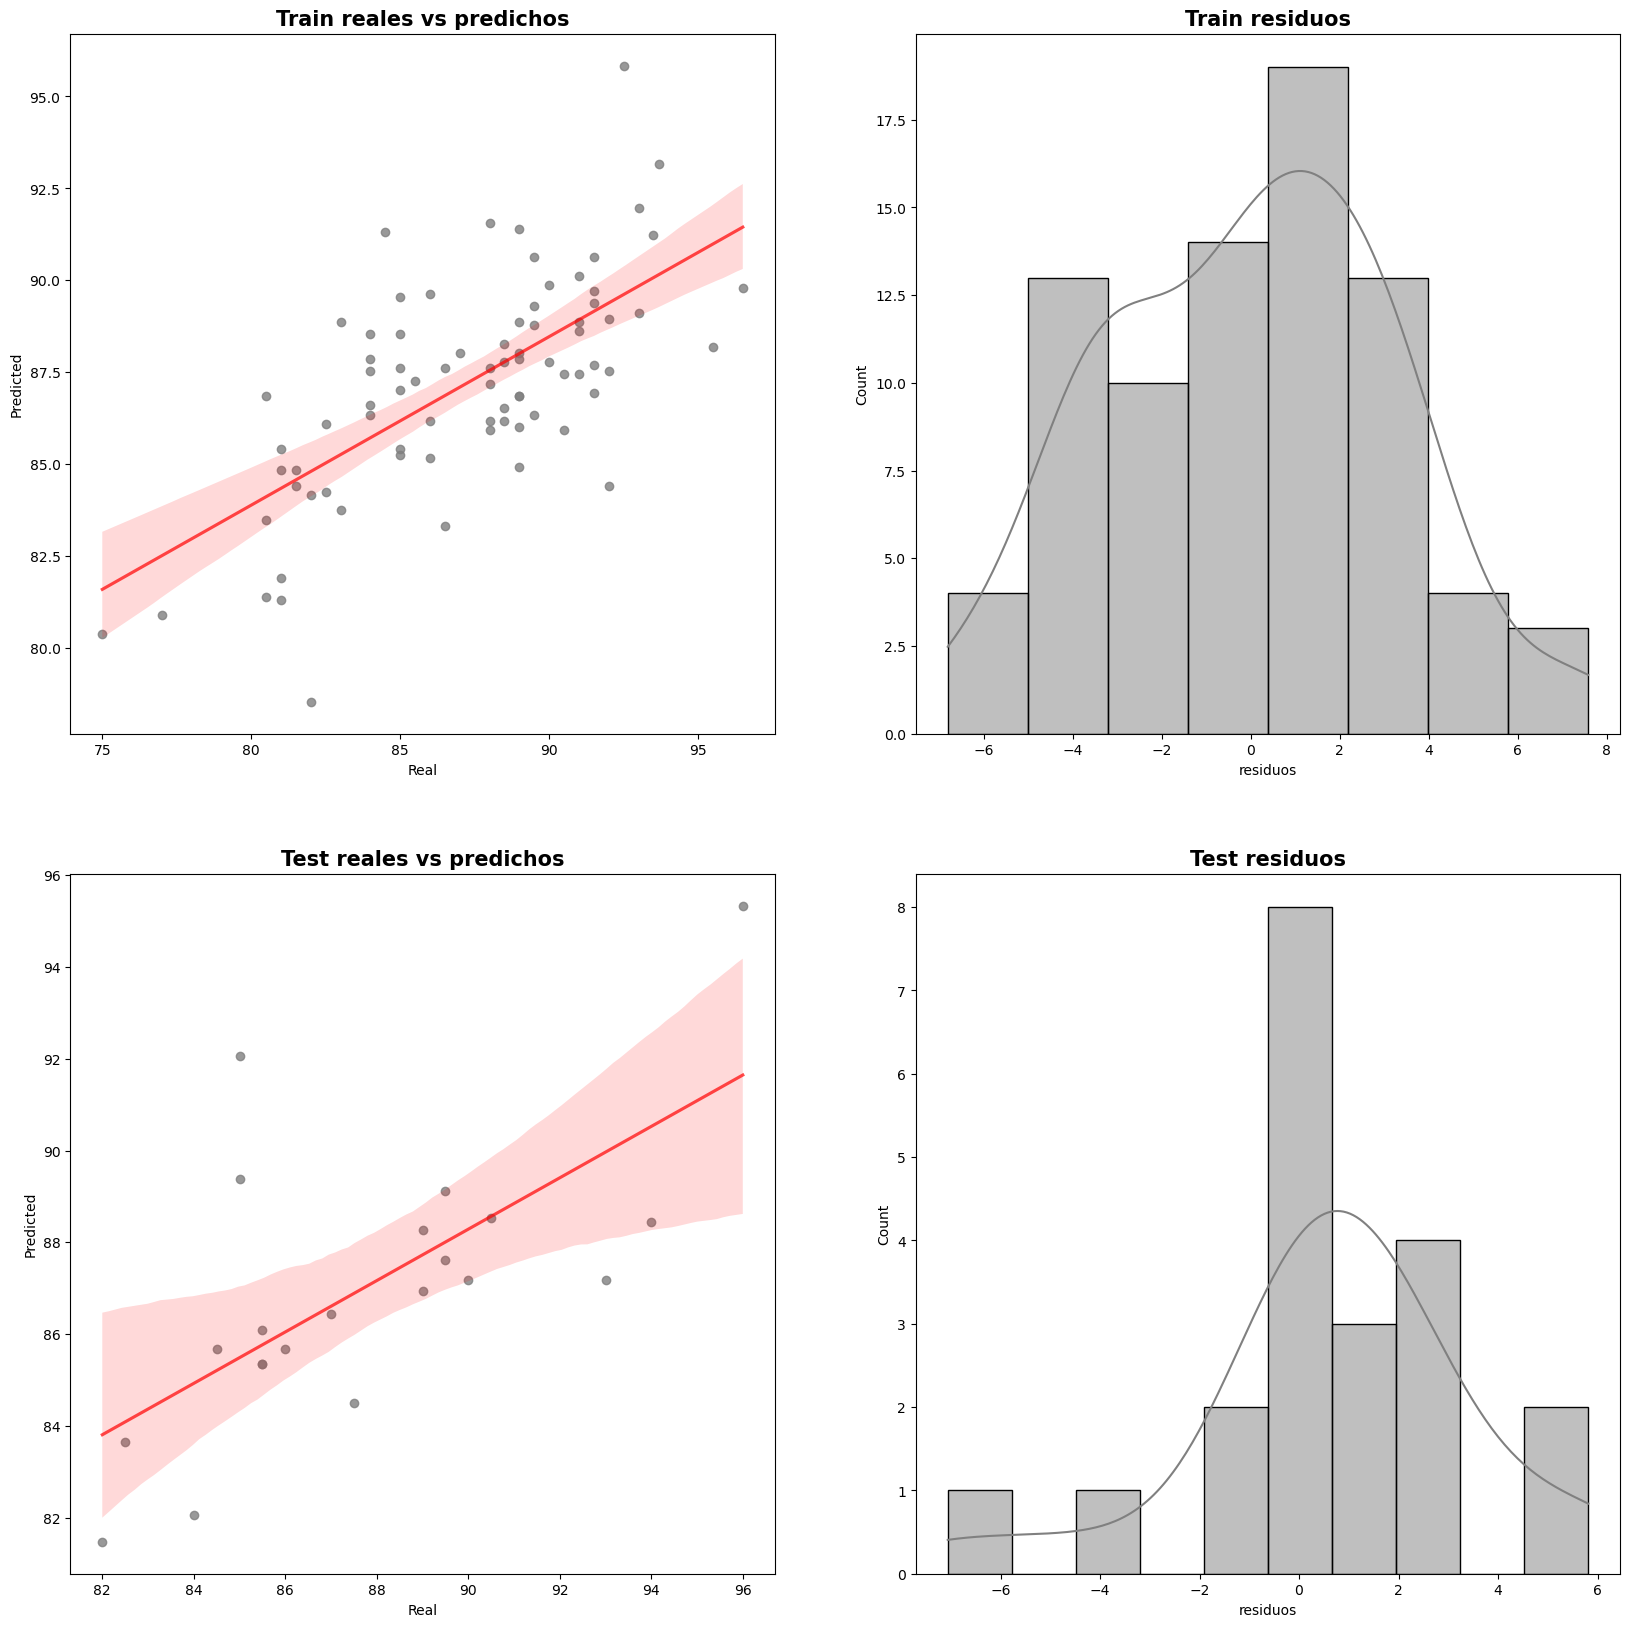

In [18]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
x = "Real", 
y = "Predicted", 
ax = ax[0,0], 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
x = "Real",
y = "Predicted", 
color = "gray",
line_kws = {"color": "red", "alpha": 0.7 }, 
ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
x="residuos",
color ="grey",
kde=True, 
ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
x="residuos",
color = "grey",
kde=True, 
ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold"); 

### CROSS-VALIDATION

In [19]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
estimator = LinearRegression(), # que algoritmo queremos usar para ajustar el modelo
X = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
y = y, # cual es nuestra variable y
scoring = 'neg_root_mean_squared_error', # que métrica queremos calcular
cv = 10 # número de veces que queremos hacer la validación
)

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-3.71059907 -2.80881759 -2.65949852 -4.18683273 -4.117506   -2.72711322
 -2.04616071 -2.28653849 -3.85668212 -3.01159716]
Média métricas de validación cruzada: -3.14113456076704


In [20]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
estimator = LinearRegression(),
X = X,
y = y,
scoring = ('r2', 'neg_root_mean_squared_error'),
cv = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores 

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.002568,0.002113,-1.535760,-3.710599
1,0.002961,0.002671,0.087924,-2.808818
2,0.002628,0.002446,0.236391,-2.659499
3,0.003158,0.003647,0.393231,-4.186833
4,0.002688,0.002080,-0.012170,-4.117506
5,0.002444,0.002174,0.083203,-2.727113
6,0.002448,0.002358,0.532335,-2.046161
7,0.002566,0.001879,0.432482,-2.286538
8,0.002708,0.003781,-0.310196,-3.856682
9,0.006120,0.001817,-0.183650,-3.011597


In [21]:
print(f'la media para el r2 es {round(cv_scores["test_r2"].mean(), 2)}')
print(f'la media para el RMSE es {abs(round(cv_scores["test_neg_root_mean_squared_error"].mean(), 2))}') 

la media para el r2 es -0.03
la media para el RMSE es 3.14


Las métricas para nuestro modelo son bastantes malas. Esto podría deberse a que tenemos muy pocos datos. Por lo tanto, para ver si podemos ajustar un modelo mejor como práctica, vamos a generar valores aleatorios para cada una de nuestras columnas predictoras. 

In [22]:
anex_hdlngth = np.random.normal(loc = df.hdlngth.mean(), scale = df.hdlngth.std(), size = (101,1))
anex_hdlngth = pd.DataFrame(anex_hdlngth)
anex_hdlngth.reset_index(inplace=True)

In [23]:
anex_hdlngth.rename(columns={0:'hdlngth'}, inplace=True)
anex_hdlngth

,index,hdlngth
0,0,0.662895
1,1,-1.341761
2,2,0.265698
3,3,-0.034659
4,4,-0.831417
...,...,...
96,96,-0.064570
97,97,-0.084524
98,98,-0.822270
99,99,-0.471950


In [24]:
anex_totlngth = np.random.normal(loc = df.totlngth.mean(), scale = df.totlngth.std(), size = (101))
anex_hdlngth = np.random.normal(loc = df.hdlngth.mean(), scale = df.hdlngth.std(), size = (101))

In [25]:
df_anex = pd.DataFrame({'totlngth': anex_totlngth, 'hdlngth':anex_hdlngth})
df_anex

,totlngth,hdlngth
0,94.472694,-0.191138
1,88.524533,-0.188597
2,85.362970,0.165603
3,77.990404,-0.692793
4,89.670583,0.973754
...,...,...
96,84.502157,0.043261
97,86.972969,1.616678
98,93.125649,0.437370
99,83.521071,0.176904


In [26]:
df_anex_variables = df[['totlngth', 'hdlngth']]
df_anex_variables

,totlngth,hdlngth
0,89.0,0.391091
1,91.5,-0.065889
2,95.5,0.362530
3,92.0,0.134040
4,85.5,-0.351501
...,...,...
96,81.5,-0.922725
97,82.5,-1.179776
98,89.0,-0.094450
99,82.5,-0.351501


In [27]:
df_anex2= pd.concat([df_anex_variables, df_anex], axis=0)
df_anex2


,totlngth,hdlngth
0,89.000000,0.391091
1,91.500000,-0.065889
2,95.500000,0.362530
3,92.000000,0.134040
4,85.500000,-0.351501
...,...,...
96,84.502157,0.043261
97,86.972969,1.616678
98,93.125649,0.437370
99,83.521071,0.176904


## Regresión lineal múltiple

In [28]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [29]:
X2 = df.drop(['case', 'site', 'Pop', 'sex', 'totlngth'], axis= 1)
y2 = df['totlngth']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [31]:
lr = LinearRegression(n_jobs=-1)

In [32]:
lr.fit(x_train, y_train) 

LinearRegression(n_jobs=-1)

In [33]:
y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) 

In [34]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df = pd.DataFrame({'Real': y_test, 'Predicted': y_predict_test, 'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head() 

,Real,Predicted,Set
89,82.0,84.423476,Train
26,85.0,83.520348,Train
42,81.0,84.313851,Train
70,83.0,84.347808,Train
15,86.0,86.071434,Train


In [35]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head() 

,Real,Predicted,Set,residuos
89,82.0,84.423476,Train,-2.423476
26,85.0,83.520348,Train,1.479652
42,81.0,84.313851,Train,-3.313851
70,83.0,84.347808,Train,-1.347808
15,86.0,86.071434,Train,-0.071434


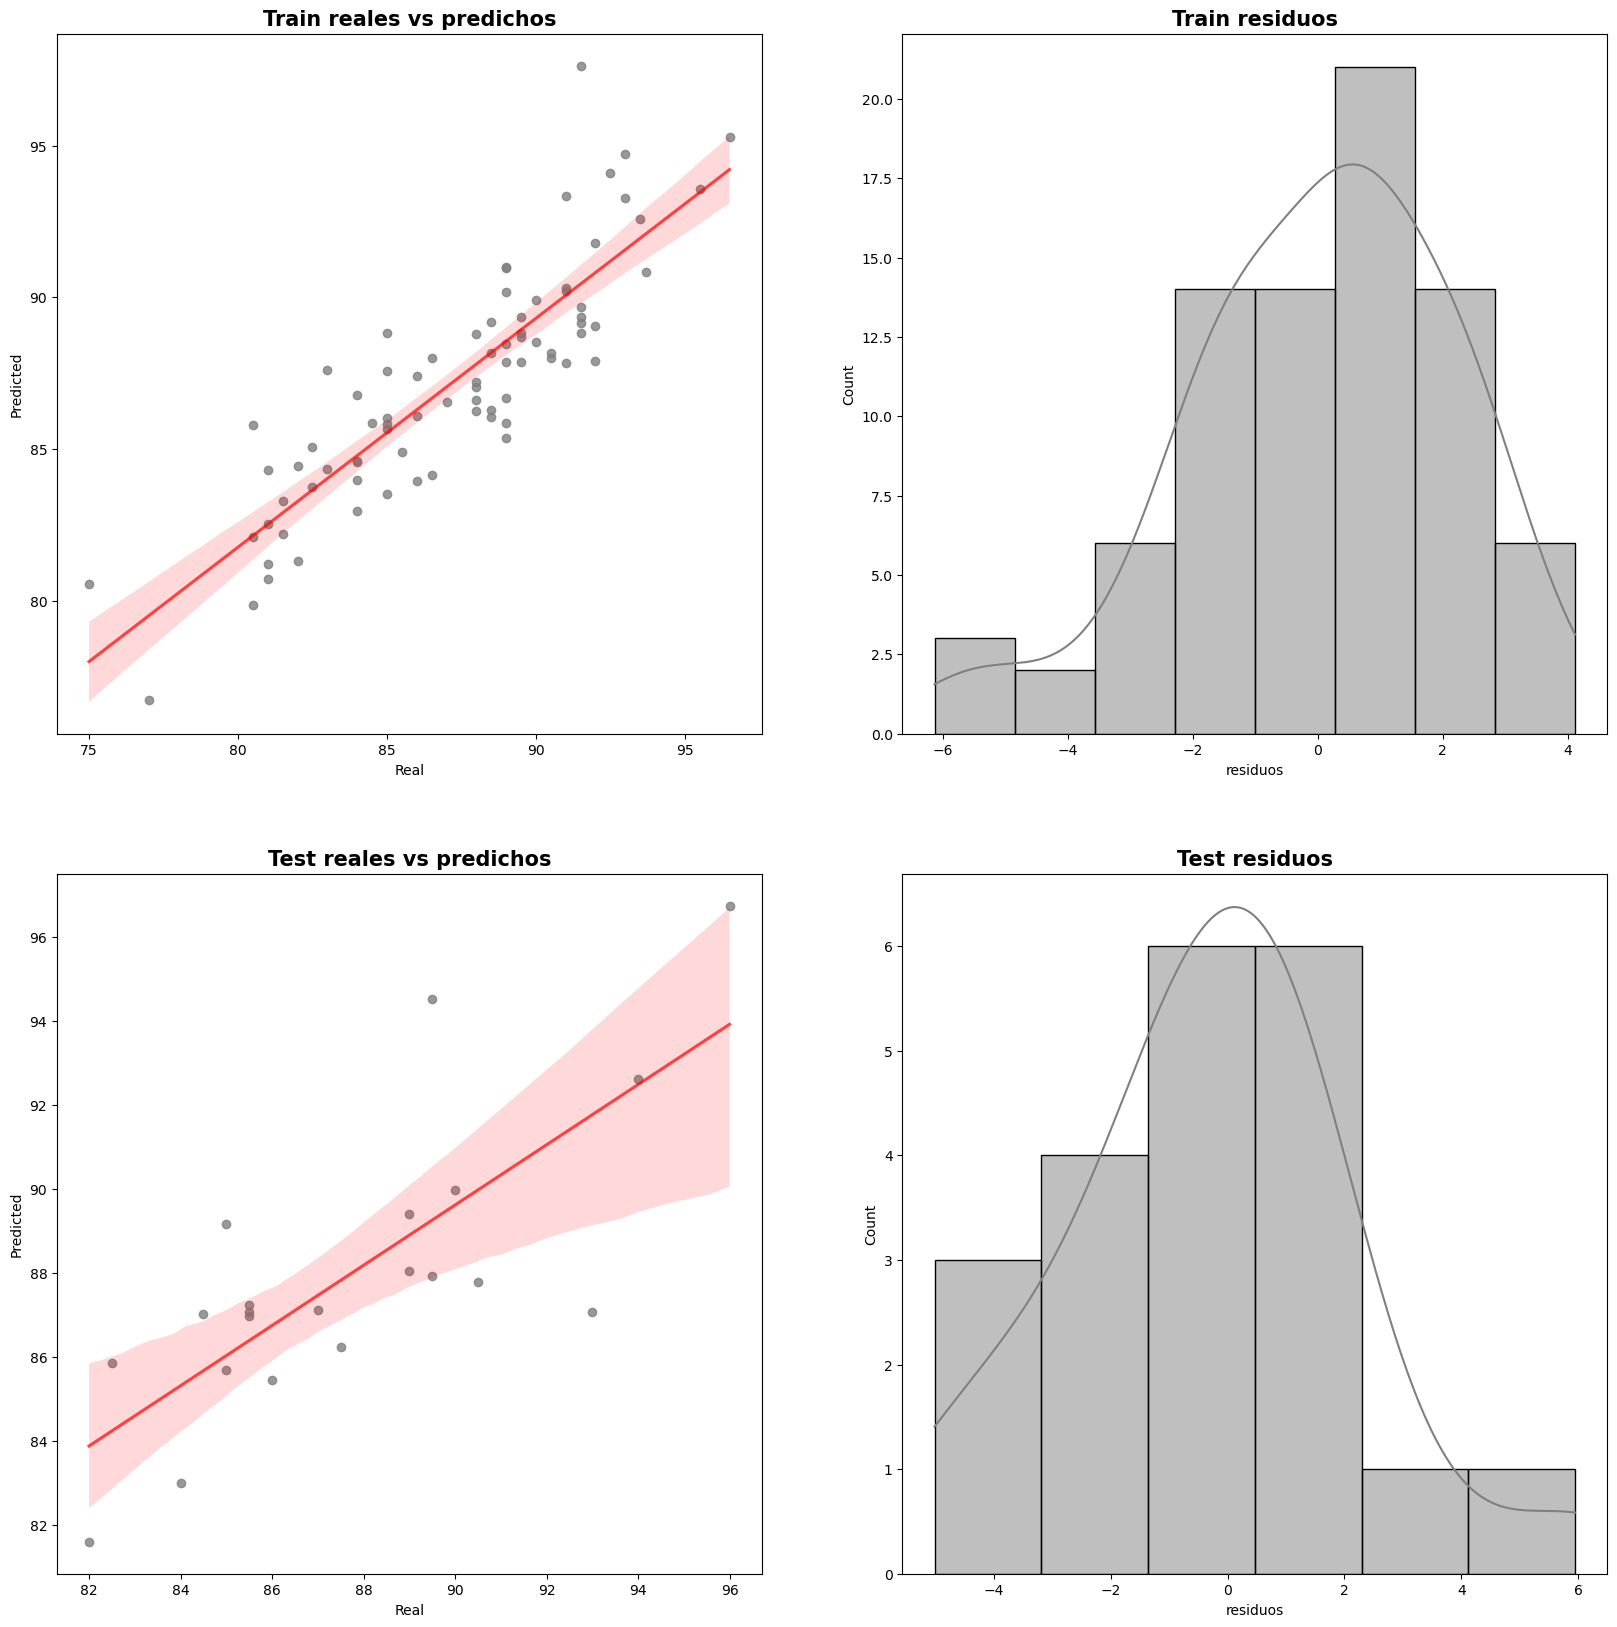

In [36]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
x = "Real", 
y = "Predicted", 
ax = ax[0,0], 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
x = "Real",
y = "Predicted", 
color = "gray",
line_kws = {"color": "red", "alpha": 0.7 }, 
ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
x="residuos",
color ="grey",
kde=True, 
ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
x="residuos",
color = "grey",
kde=True, 
ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold"); 

### CROSS-VALIDATION

In [37]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
estimator = LinearRegression(), # que algoritmo queremos usar para ajustar el modelo
X = X2, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
y= y2, # cual es nuestra variable y
scoring = 'neg_root_mean_squared_error', # que métrica queremos calcular
cv = 10 # número de veces que queremos hacer la validación
)

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-2.14933062 -2.31972711 -2.52635743 -3.79414385 -3.14770223 -1.87070176
 -1.22800677 -1.00818373 -2.35762575 -2.8088991 ]
Média métricas de validación cruzada: -2.32106783494907


In [38]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
estimator = LinearRegression(),
X = X2,
y = y2,
scoring = ('r2', 'neg_root_mean_squared_error'),
cv = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores 

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.007635,0.003987,0.149202,-2.149331
1,0.003556,0.002288,0.377904,-2.319727
2,0.003133,0.002945,0.310933,-2.526357
3,0.003617,0.003052,0.501712,-3.794144
4,0.003706,0.002669,0.408476,-3.147702
5,0.003091,0.004796,0.568604,-1.870702
6,0.002771,0.002295,0.831555,-1.228007
7,0.004598,0.001947,0.889668,-1.008184
8,0.002825,0.002916,0.510381,-2.357626
9,0.002633,0.003235,-0.029679,-2.808899


In [39]:
print(f'la media para el r2 es {round(cv_scores["test_r2"].mean(), 2)}')
print(f'la media para el RMSE es {abs(round(cv_scores["test_neg_root_mean_squared_error"].mean(), 2))}')

la media para el r2 es 0.45
la media para el RMSE es 2.32


In [44]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):


    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
        'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
        'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
        'R2': [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
        "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df 

In [46]:
rl_results1 = metricas(y_test, y_train, y_predict_test, y_predict_train, "Regresión Lineal Multiple")
rl_results1 

,MAE,MSE,RMSE,R2,set,modelo
0,1.792403,5.721179,2.391899,0.564016,test,Regresión Lineal Multiple
1,1.701550,4.551175,2.133348,0.754330,train,Regresión Lineal Multiple


In [47]:
rl_results1 = pd.DataFrame(rl_results1)

In [48]:
rl_results1.to_csv("../datos/metricas_rlm.csv")

Vamos a repetir el modelo de rl simple con el set de datos multiplicado. 

<AxesSubplot:xlabel='hdlngth', ylabel='totlngth'>

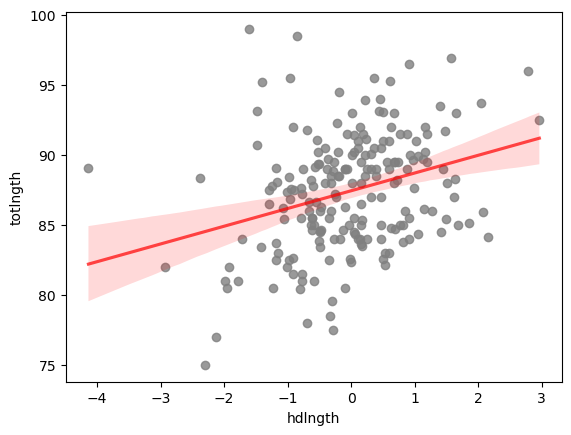

In [50]:
# ploteamos los reales vs los predichos
sns.regplot(data = df_anex2, 
x = "hdlngth", 
y = "totlngth", 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })

In [49]:
df_anex2.shape

(202, 2)

In [54]:
X3 = df_anex2[['hdlngth']]
y3 = df_anex2["totlngth"]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [56]:
x_train.describe()

,hdlngth
count,161.000000
mean,0.036032
std,0.925968
min,-2.373477
25%,-0.601175
50%,0.004525
75%,0.619580
max,2.961600


In [57]:
x_test.describe()

,hdlngth
count,41.000000
mean,-0.338824
std,1.229956
min,-4.134321
25%,-0.894164
50%,-0.265817
75%,0.311634
max,2.790233


In [58]:
lr = LinearRegression(n_jobs=-1)

In [59]:
lr.fit(x_train, y_train) 

LinearRegression(n_jobs=-1)

In [60]:
y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) 

In [65]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df = pd.DataFrame({'Real': y_test, 'Predicted': y_predict_test, 'Set': ['Test']*len(y_test)})
resultados2 = pd.concat([train_df,test_df], axis = 0)
resultados2.head() 

,Real,Predicted,Set
98,93.125649,87.998766,Train
38,75.000000,84.533109,Train
24,91.500000,88.556185,Train
21,85.445190,89.331772,Train
96,84.502157,87.498646,Train


In [66]:
resultados2['residuos'] = resultados2['Real'] - resultados2['Predicted']
resultados2.head() 

,Real,Predicted,Set,residuos
98,93.125649,87.998766,Train,5.126883
38,75.000000,84.533109,Train,-9.533109
24,91.500000,88.556185,Train,2.943815
21,85.445190,89.331772,Train,-3.886582
96,84.502157,87.498646,Train,-2.996489


/home/cachito/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

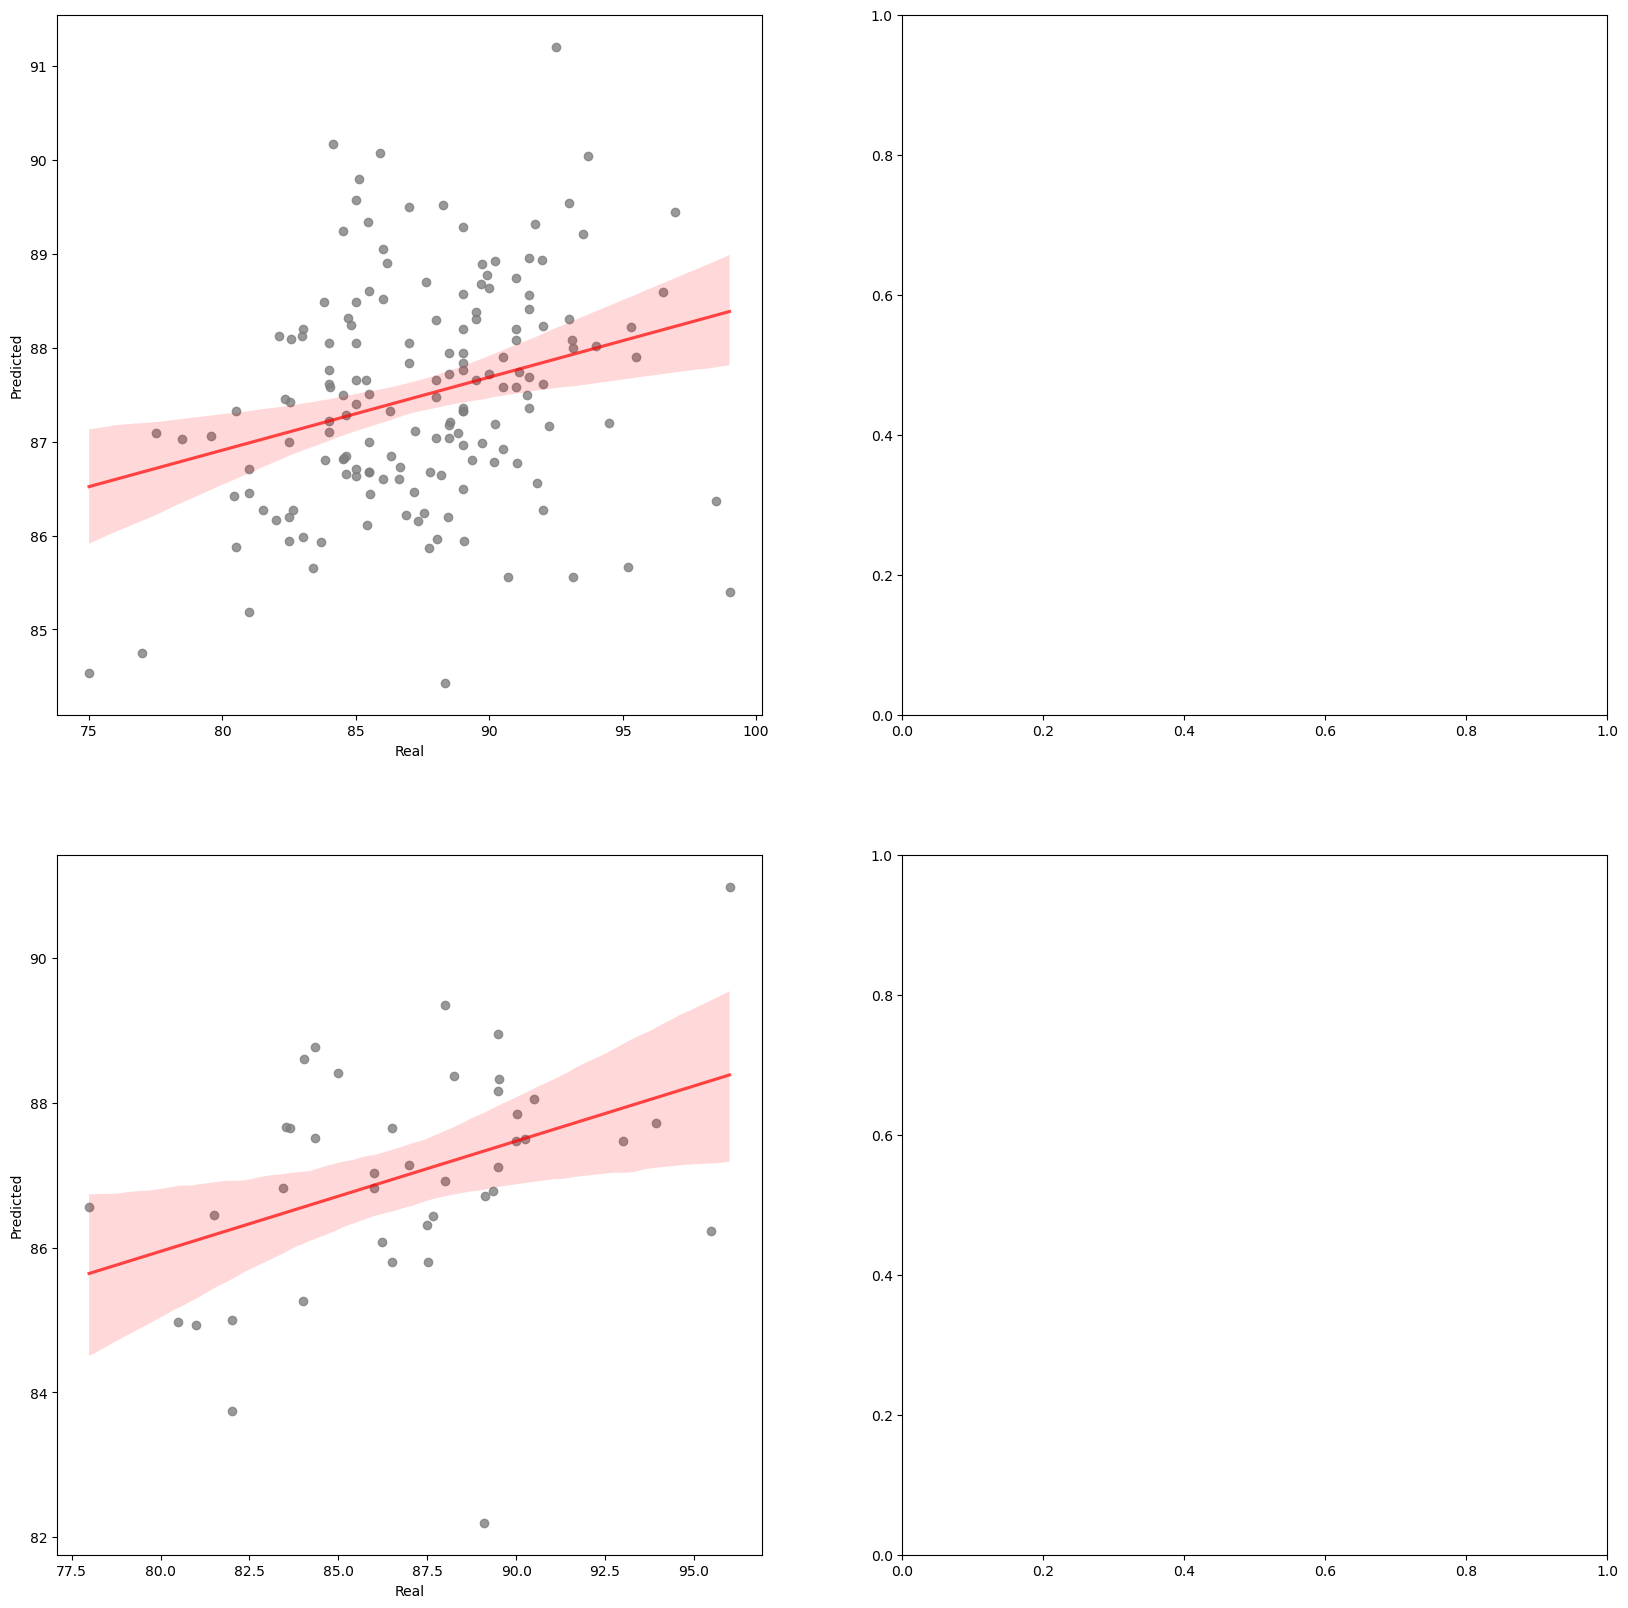

In [70]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados2[resultados2['Set'] == "Train"], 
x = "Real", 
y = "Predicted", 
ax = ax[0,0], 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados2[resultados2['Set'] == "Test"], 
x = "Real",
y = "Predicted", 
color = "gray",
line_kws = {"color": "red", "alpha": 0.7 }, 
ax = ax[1,0])


# ploteamos los residuos
sns.histplot(data = resultados2[resultados2['Set'] == "Train"],
x="residuos",
color ="grey",
kde=True, 
ax = ax[0,1])


sns.histplot(data = resultados2[resultados2['Set'] == "Test"],
x="residuos",
color = "grey",
kde=True, 
ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold"); 